# Problem statement.

* This dataset comprises used cars sold in India as well as important features of these cars.
* Here, user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

# importing necessary libraries

In [1]:
!pip install pandas

In [2]:
pip install pandas numpy matplotlib seaborn six

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pandas numpy matplotlib seaborn six

In [4]:
!pip install mysql-connector-python

In [5]:
!pip install matplotlib


In [6]:
!pip show matplotlib


Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\rohit\anaconda3\lib\site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: mediapipe, seaborn


In [7]:
!pip install Pillow


In [8]:
!pip show Pillow


Name: Pillow
Version: 9.2.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: c:\users\rohit\anaconda3\lib\site-packages
Requires: 
Required-by: bokeh, datashader, imageio, matplotlib, scikit-image


In [9]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import os
# import seaborn as sns
from six.moves import urllib

import warnings

warnings.filterwarnings("ignore")

# %matplotlib inline
import mysql.connector as connection

# Data Collection

In [10]:
download_dir ="./data/"

download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"

os.makedirs(download_dir, exist_ok=True)
file_name = os.path.basename(download_url)
print(file_name)

download_file = os.path.join(download_dir, file_name)
print(download_file)

urllib.request.urlretrieve(download_url, download_file)

cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x285fd3a70d0>)

# Data read from local machine

In [11]:
df = pd.read_csv(download_file)
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [12]:
range(1,len(df)+1)

range(1, 15412)

In [13]:
df["Unnamed: 0"] = range(1,len(df)+1)
df.rename(columns={'Unnamed: 0': "car_id"}, inplace= True)

In [14]:
df

,car_id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,15407,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,15408,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,15409,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,15410,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [15]:
# Load the dataset
data = df.copy()

# Separate the dataset into three tables
car_info = data[["car_id",'car_name', 'brand', 'model', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]
car_usage = data[['car_id', 'vehicle_age', 'km_driven', 'seller_type']]
car_selling_price = data[['car_id', 'selling_price']]

# Save each table to separate CSV files
car_info.to_csv('car_info.csv', index=False)
car_usage.to_csv('car_usage.csv', index=False)
car_selling_price.to_csv('car_selling_price.csv', index=False)

In [16]:
df =df.drop("car_id", axis=1)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [17]:
def create_db(mydb_connector, db):
    query = f"create database if not exists {db};"
    cursor = mydb_connector.cursor()
    cursor.execute(query)

try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123")
    print(mydb.is_connected())
    if mydb.is_connected():
        create_db(mydb, "car_dataset")
        print("database created successfully")
except Exception as e:
    print(e)


2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)


In [1]:
def create_table(mydb_connector, query):
    print(mydb.is_connected())
    if mydb.is_connected():
        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.close()

try:
        mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")

        query = """create table if not exists car_dataset( car_name varchar(30),
    brand varchar(30),model varchar(30),vehicle_age int,km_driven bigint,seller_type varchar(30),
    fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int,selling_price bigint);"""
        create_table(mydb, query)
        print("car dataset table created successfully")
except Exception as e:
    print(e)

name 'connection' is not defined


In [19]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [20]:
def dataframetosql(mydb_connector,dataframe):
    query = f"delete from car_dataset;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)
    mydb_connector.commit()
    print(len(dataframe.columns))
    for (key, value) in dataframe.iterrows():
        
        car_name = value[0]
        brand = value[1]
        model = value[2]
        vehicle_age = value[3]
        km_driven = value[4]
        seller_type = value[5]
        fuel_type = value[6]
        transmission_type = value[7]
        mileage = value[8]
        engine = value[9]
        max_power = value[10]
        seats = value[11]
        selling_price = value[12]
        
        query = f"INSERT INTO car_dataset VALUES('{car_name}','{brand}','{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"

        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.commit()

try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        dataframetosql(mydb, df)
        print("data inserted successfully")
except Exception as e:
    print(e)

2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)


import mysql.connector as connection

def create_db(mydb_connector):
    query = "create database if not exists car_database;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)


try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123")
    print(mydb.is_connected())
    if mydb.is_connected():
        create_db(mydb)
        print("database created successfully")
except Exception as e:
    print(e)

def create_table(mydb_connector, query):
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.close()

try:
    
        query = """create table if not exists car_dataset( car_id int primary key,car_name varchar(30),
    brand varchar(30),model varchar(30),vehicle_age int,km_driven bigint,seller_type varchar(30),
    fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int,selling_price bigint);"""
        create_table(mydb, query)
        print("raw car dataset table created successfully")


        query = """create table if not exists car_info(car_id int primary key,car_name varchar(30),brand varchar(30),model varchar(30),fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int);"""
        create_table(mydb, query)
        print("car info table created successfully")


        query = """create table if not exists car_usage(car_id int primary key,
        vehicle_age int,
        km_driven bigint,
        seller_type varchar(30);"""
        create_table(mydb, query)
        print("car usage table created successfully")

        # query = """create table if not exists car_selling_price(car_id int primary key, selling_price bigint);"""
        # create_table(mydb, query)
        # print("car selling price table created successfully")
except Exception as e:
    print(e)

def dataframetosql(mydb_connector,dataframe):
    query = f"delete from car_dataset;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)
    mydb_connector.commit()
    print(len(dataframe.columns))
    for (key, value) in dataframe.iterrows():
        car_id = value[0]
        car_name = value[1]
        brand = value[2]
        model = value[3]
        vehicle_age = value[4]
        km_driven = value[5]
        seller_type = value[6]
        fuel_type = value[7]
        transmission_type = value[8]
        mileage = value[9]
        engine = value[10]
        max_power = value[11]
        seats = value[12]
        selling_price = value[13]
        
        query = f"INSERT INTO car_dataset VALUES({car_id},'{car_name}','{brand}','{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"

        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.commit()

try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        dataframetosql(mydb, df)
        print("data inserted successfully")
except Exception as e:
    print(e)

In [21]:
# top 5 datasets
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [22]:
df.sample()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
12497,Hyundai Creta,Hyundai,Creta,5,71000,Dealer,Diesel,Automatic,17.01,1582,126.2,5,1080000


In [23]:
# bottom 5 datasets
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
15410,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000


In [24]:
df.shape 

(15411, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [26]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [27]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [28]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [29]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [30]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# EDA => Exploratory Data Analysis

In [31]:
df["car_name"].dtype

dtype('O')

In [32]:
df["max_power"].dtype

dtype('float64')

In [33]:
df["car_name"].dtype == 'O'

True

In [34]:
df["car_name"].dtype != 'O'

False

In [35]:
# filtering the numerical and categorical data using list comprehension

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [36]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [37]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print()
    print("-----------------------------------------------------")
    print()

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Maserati Ghibli       0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Isuzu MUX             0.006489
Ferrari GTC4Lusso     0.006489
Name: car_name, Length: 121, dtype: float64

-----------------------------------------------------

Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0

# Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

**Note=> Explaination=> if you need to analyze the specific feature and not compare with any other features as such. then it is said to be Univariate analysis.**

# Numerical features

In [38]:
pip install matplotlib


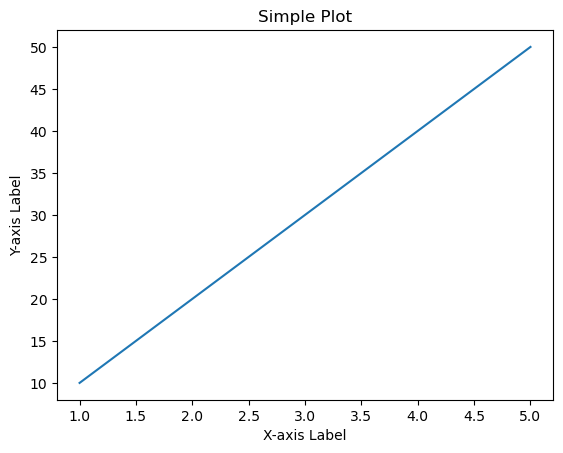

In [39]:
import matplotlib.pyplot as plt

# Simple plot
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

plt.plot(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Plot')
plt.show()


In [40]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [41]:
import seaborn as sns


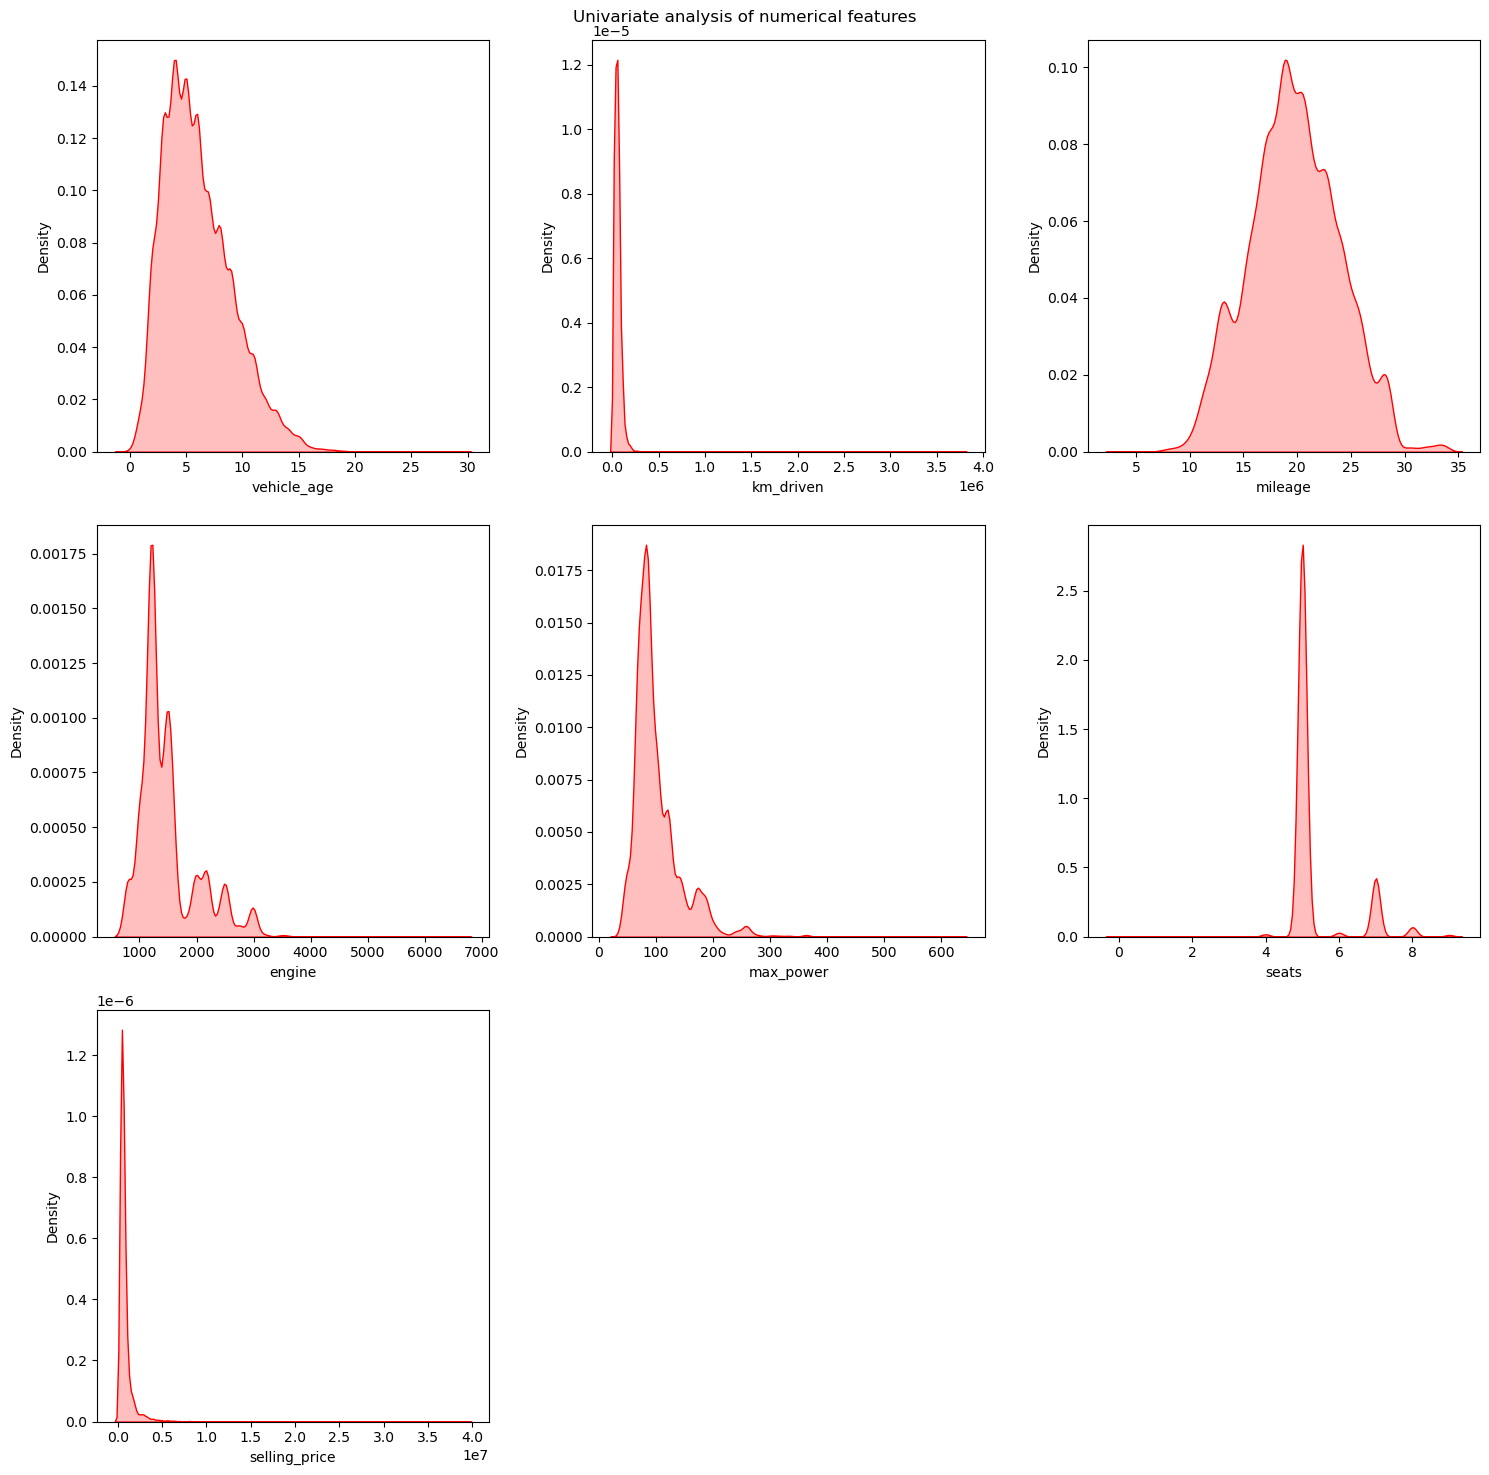

In [42]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade =True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

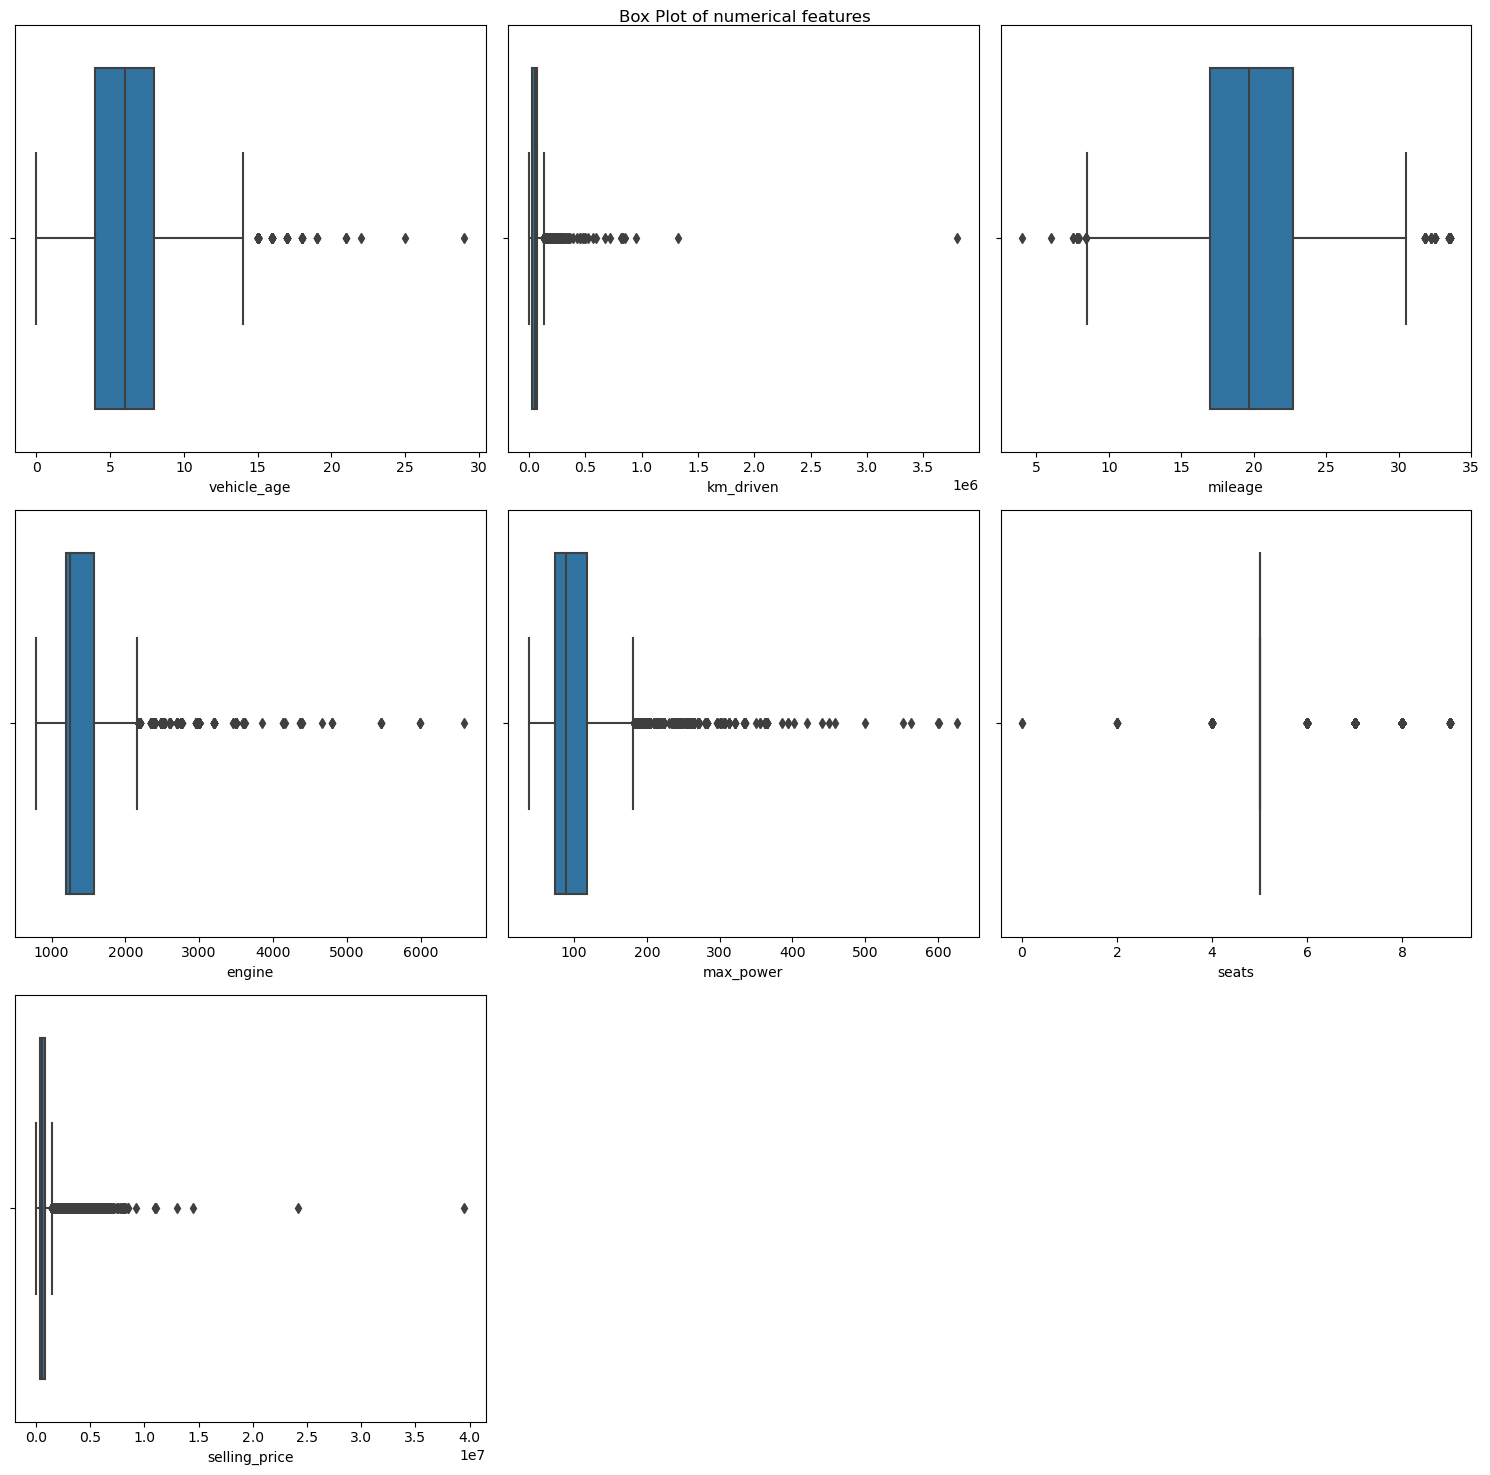

In [43]:
plt.figure(figsize=(15,15))

plt.suptitle("Box Plot of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# categorical features


In [44]:
df[categorical_features]

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
1,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
2,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
3,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
4,Maruti Alto,Maruti,Alto,Individual,CNG,Manual
...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,Individual,Petrol,Automatic
15408,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,Dealer,Petrol,Automatic


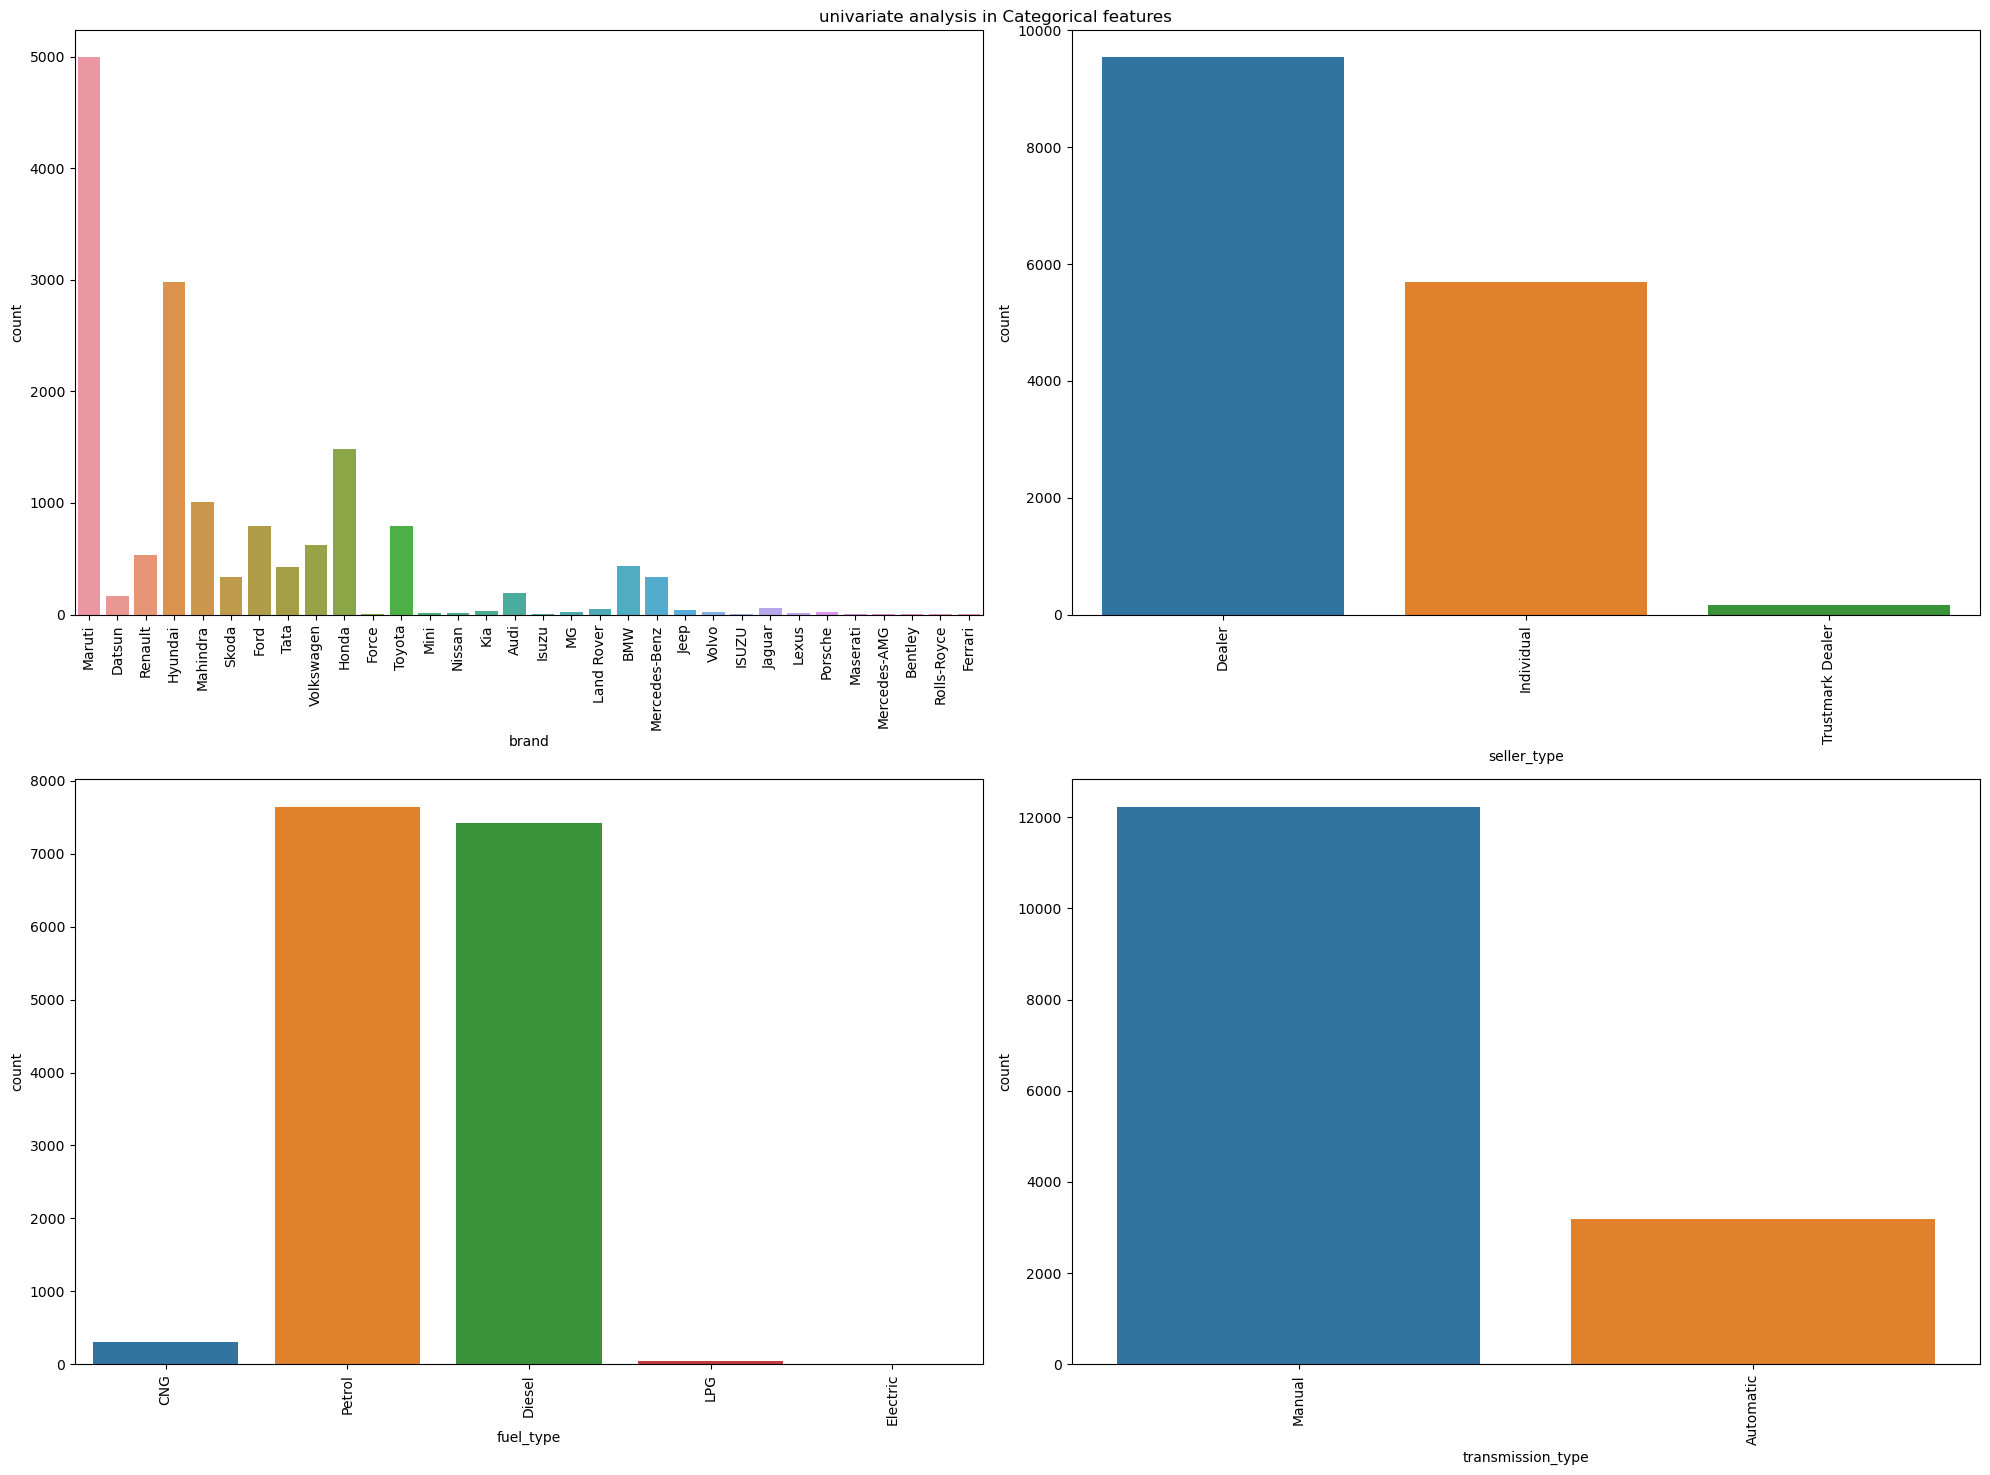

In [45]:
# categorical features
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()


# multi-variant analysis


In [46]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


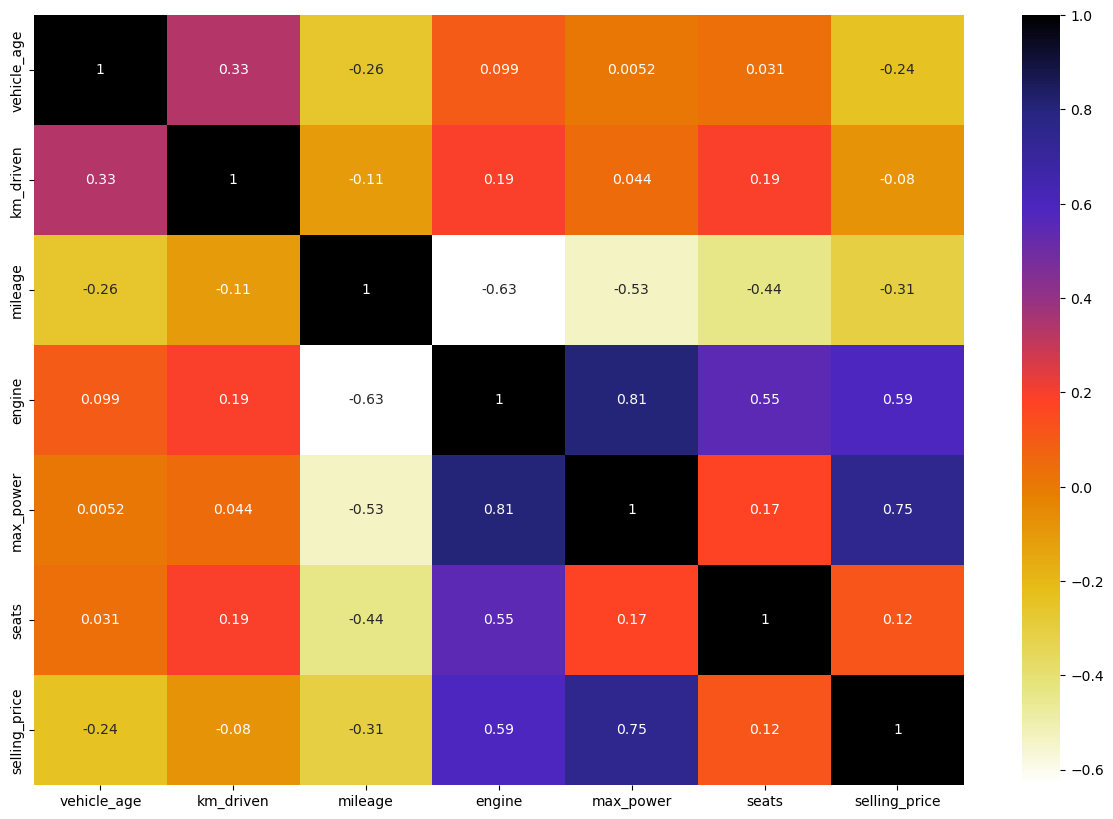

In [47]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numeric_features].corr(), cmap="CMRmap_r",annot=True)
plt.show()

# Checking the Outliers


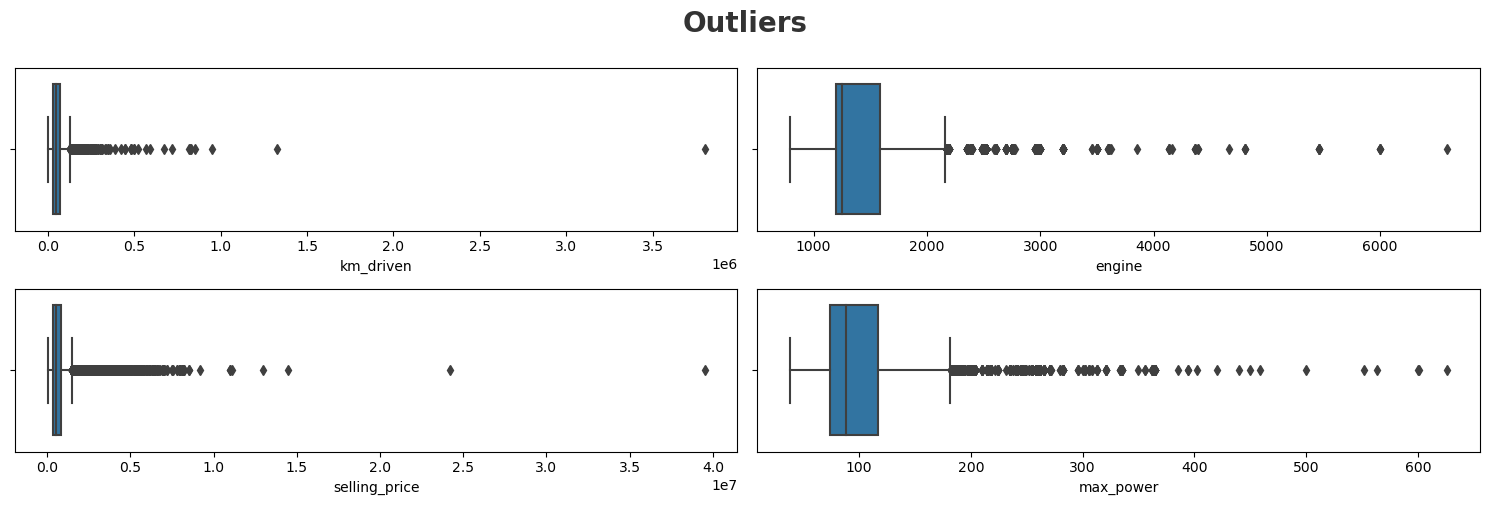

In [48]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()

# Outlier detection and removal using IQR

In [49]:
total_number_of_outliers_detected = []

def outlier_detection_and_removal(df1, col_name):

  print("-------------------------------------------------------------------------------\n")
  print(col_name)
  print()
  print()
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.75)

  print(f"Q1={Q1}, Q3={Q3}")

  IQR = Q3 - Q1
  print(f"IQR={IQR}")

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

  outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
  total_number_of_outliers_detected.append(len(outlier_detected))
  #print(outlier_detected)

  df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)] # outliers removed from each column
  return df1
  #print(df1)

df1 = df.copy()
for i in outliers:

  df1 = outlier_detection_and_removal(df1, i)
  print(df1)

print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



-------------------------------------------------------------------------------

km_driven


Q1=30000.0, Q3=70000.0
IQR=40000.0
lower_limit= -30000.0, upper_limit = 130000.0
                  car_name        brand        model  vehicle_age  km_driven  \
0              Maruti Alto       Maruti         Alto            9      53800   
1              Maruti Alto       Maruti         Alto           11      11000   
2              Maruti Alto       Maruti         Alto           11      80000   
3              Maruti Alto       Maruti         Alto           10      57000   
4              Maruti Alto       Maruti         Alto           11      72000   
...                    ...          ...          ...          ...        ...   
15406  Bentley Continental      Bentley  Continental           10      30000   
15407    Rolls-Royce Ghost  Rolls-Royce        Ghost            4       5000   
15408  Bentley Continental      Bentley  Continental            9      37500   
15409    Ferrari GTC4Lusso

In [50]:
df1

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,Toyota Innova,Toyota,Innova,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
12967,Toyota Innova,Toyota,Innova,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
12968,Toyota Innova,Toyota,Innova,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
12969,Toyota Innova,Toyota,Innova,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


In [51]:
df1.reset_index(inplace=True)

In [52]:
df1.drop(columns=['index'], axis=1, inplace=True)

In [53]:
df1.to_csv("cleaned_cars.csv", index=False)

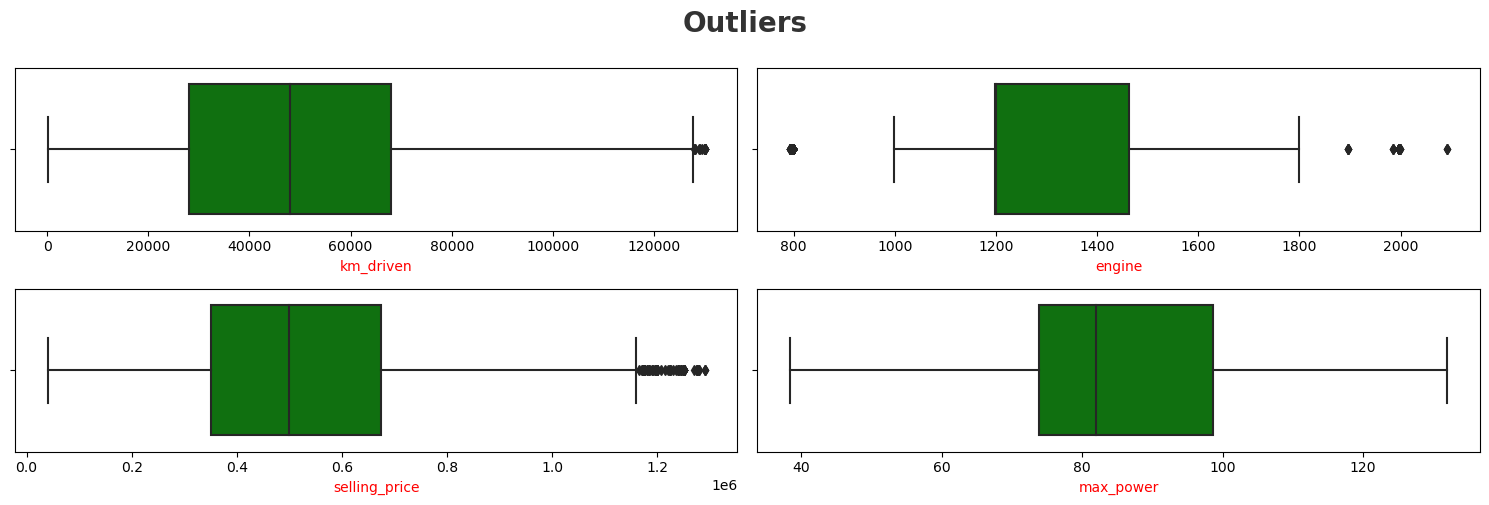

In [54]:
# Checking the Box plot after removing outliers
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df1[outliers[i]], color='green')
    plt.xlabel(outliers[i], color= 'r')
    plt.tight_layout()

# insights from the data visualization

Selling price distribution

In [55]:
df['selling_price']

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

(0.0, 3000000.0)

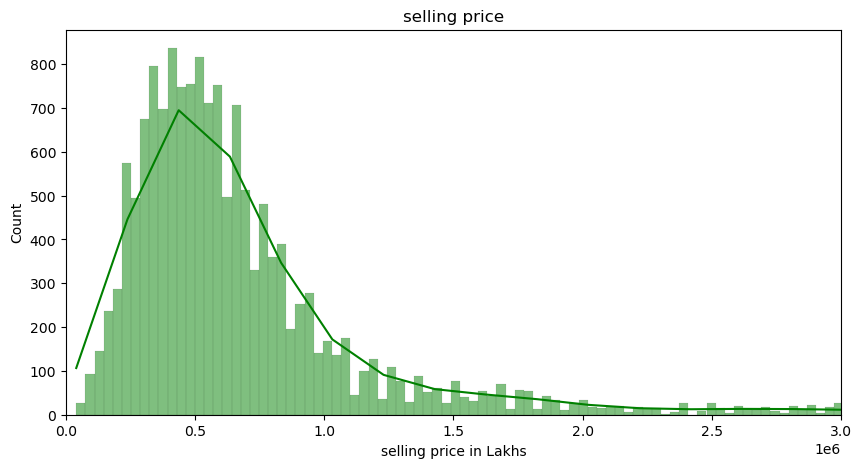

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(df["selling_price"], kde=True,color='g')
plt.title("selling price")
plt.xlabel('selling price in Lakhs')
plt.xlim(0,3000000)

In [57]:
# most cars sold on dataset
df["car_name"].value_counts()

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Maserati Ghibli         1
Hyundai Aura            1
Force Gurkha            1
Isuzu MUX               1
Ferrari GTC4Lusso       1
Name: car_name, Length: 121, dtype: int64

In [58]:
# top 10 most cars sold on cars_dataset
df["car_name"].value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

- observation
- Hyndai i20 is most sold car

In [59]:
df["car_name"].value_counts().head(10)

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

In [60]:
df["car_name"].value_counts().index[0:10]

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object')

In [61]:
df["car_name"].value_counts().head(10).index

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

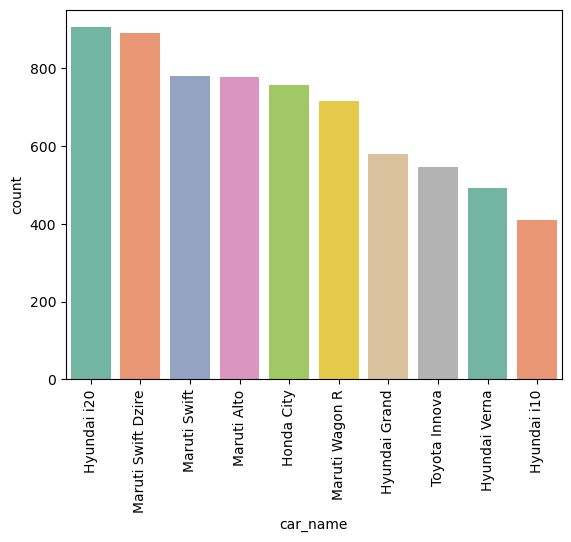

In [62]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

In [63]:
# mean of i20 to find one car price
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


# most sold car by brand

In [64]:
df.brand.value_counts().head(10)

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='count'>

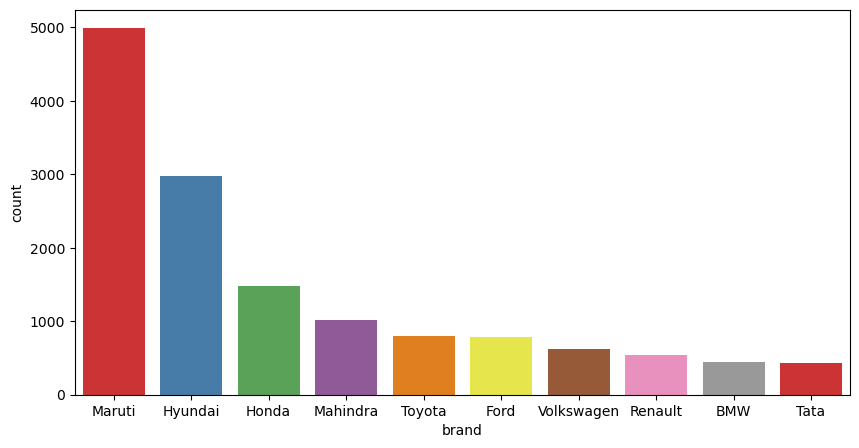

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [66]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()


487089.3179086539

In [67]:
# Top most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
max_brand_name = df[df["selling_price"]==max_brand_price.max()]
max_brand_name['brand']

15409    Ferrari
Name: brand, dtype: object

In [68]:
# Top 10 most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [69]:
df[df["selling_price"]==max_brand_price.max()]['brand']

15409    Ferrari
Name: brand, dtype: object

In [70]:
max_brand_price= df.groupby('brand').selling_price.max()


In [71]:
m = max_brand_price.sort_values(ascending=False)[:10:]
m.index

Index(['Ferrari', 'Rolls-Royce', 'Bentley', 'Mercedes-Benz', 'Porsche',
       'Land Rover', 'BMW', 'Volvo', 'Lexus', 'Audi'],
      dtype='object', name='brand')

<AxesSubplot:xlabel='brand', ylabel='selling_price'>

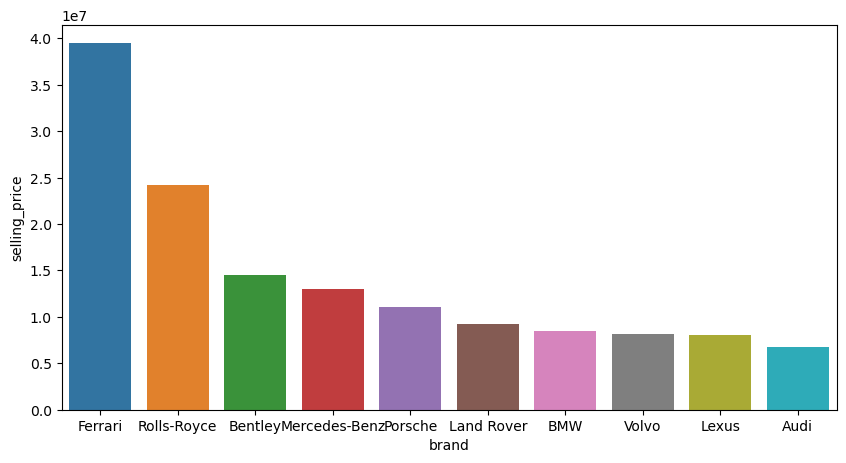

In [72]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
# print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'])


Top 10 costlier cars in dataset

In [73]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ferrari GTC4Lusso'),
  Text(1, 0, 'Rolls-Royce Ghost'),
  Text(2, 0, 'Bentley Continental'),
  Text(3, 0, 'Mercedes-Benz S-Class'),
  Text(4, 0, 'Porsche Cayenne'),
  Text(5, 0, 'Land Rover Rover'),
  Text(6, 0, 'BMW 7'),
  Text(7, 0, 'BMW Z4'),
  Text(8, 0, 'Volvo XC'),
  Text(9, 0, 'BMW X5')])

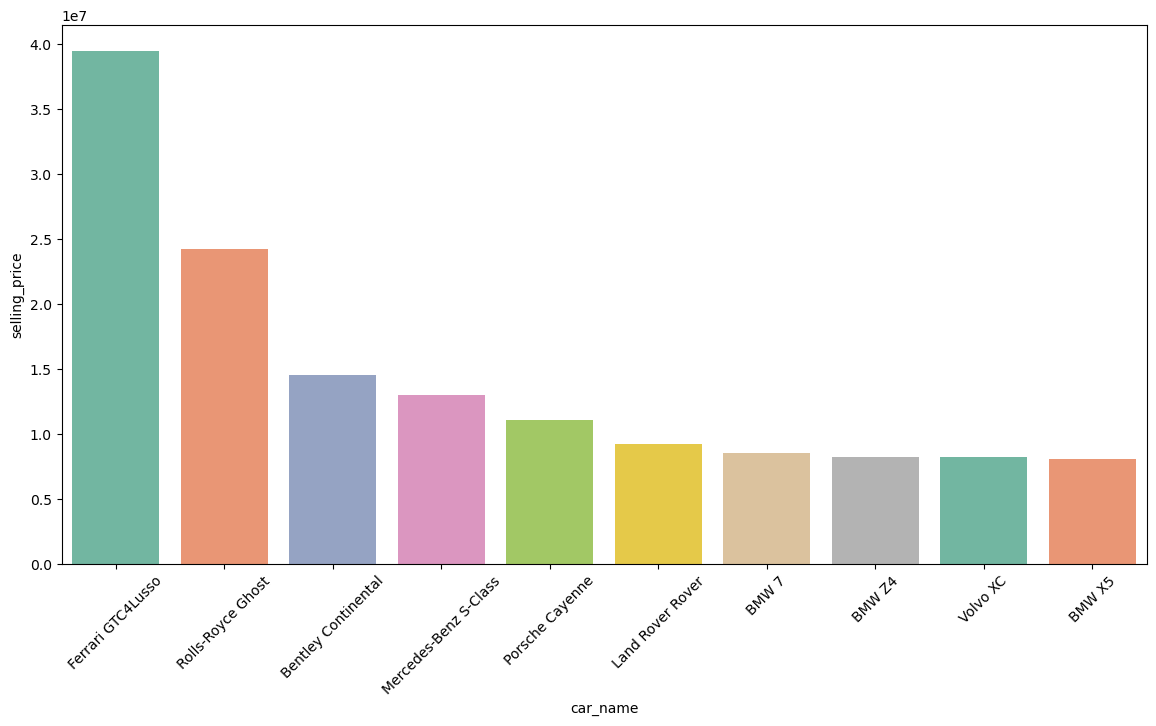

In [74]:
plt.figure(figsize=(14,7))

sns.barplot(x = car.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

Km driven vs vehicle age

<AxesSubplot:xlabel='vehicle_age', ylabel='km_driven'>

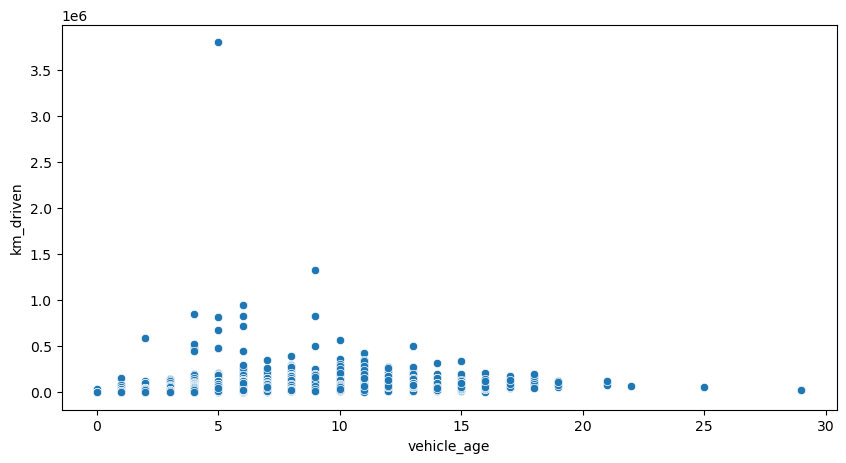

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'])

In [76]:
# Calculate the maximum value of the km_driven column
max_km_driven = df.km_driven.max()

# Find the index of the row where km_driven equals this maximum value
index = df[df["km_driven"] == max_km_driven].index

# Retrieve the first index
first_index = index[0]

# Optional: Drop the row with the maximum km_driven value
# df.drop(first_index, inplace=True)

print(first_index)

#df.drop(index[0], inplace=True)

13314


In [77]:
df[df["km_driven"]==max_km_driven]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
13314,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


<AxesSubplot:xlabel='km_driven', ylabel='vehicle_age'>

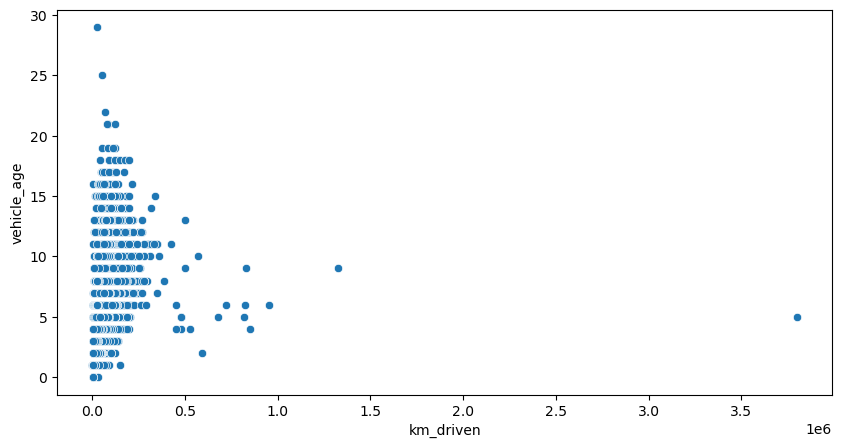

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['km_driven'],y=df['vehicle_age'])

In [79]:
# top 10 mileage based on brand on 
mileage=df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


Text(0, 0.5, 'Mileage in kmpl')

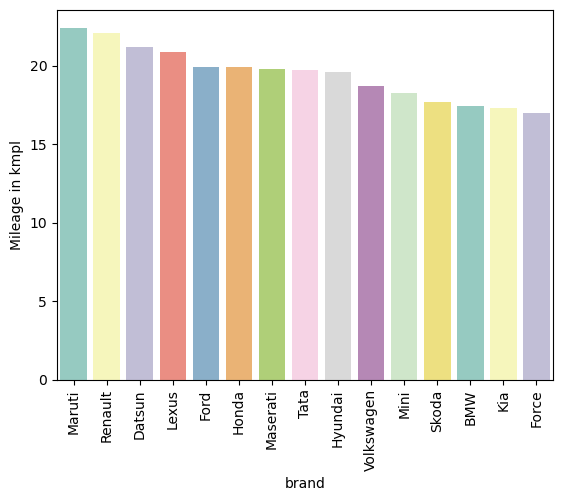

In [80]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set3')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

In [81]:
# most milage car

mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire LXI'),
  Text(7, 0, 'Maruti Dzire ZXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift')])

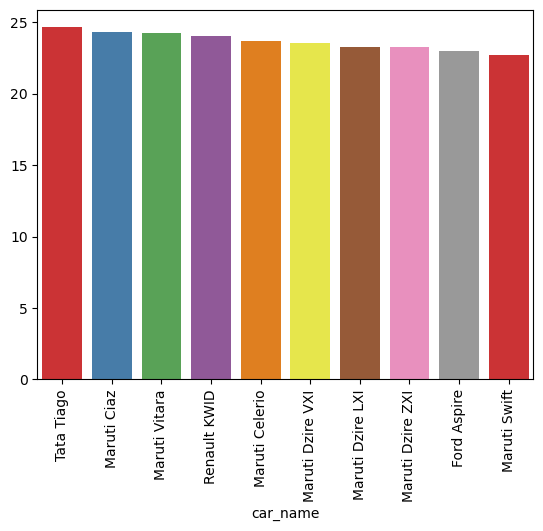

In [82]:
sns.barplot(x=mileage_car.index,y=mileage_car.values, palette='Set1')
plt.xticks(rotation= 90)

# km_driven vs selling price

(-10000.0, 10000000.0)

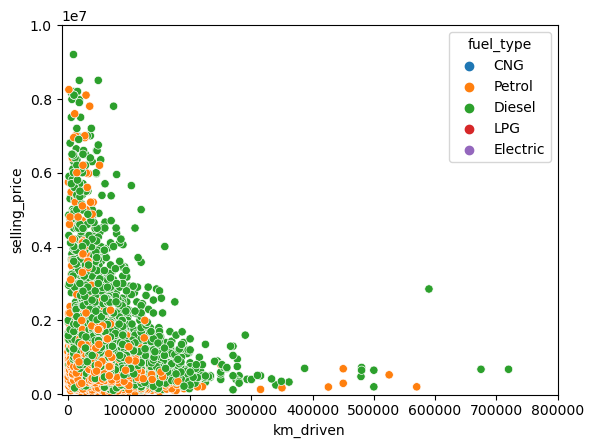

In [83]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-10000,800000)
plt.ylim(-10000,10000000)

Brand vs selling price

In [84]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

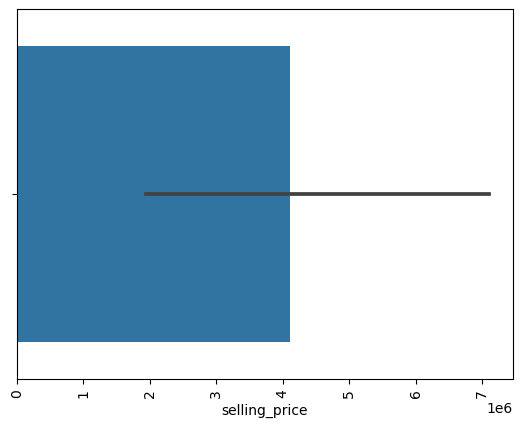

In [85]:
sns.barplot(brand_price)
plt.xticks(rotation=90)

Brand vs Km driven

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'Skoda'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Force'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Kia'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Isuzu'),
  Text(17, 0, 'MG'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'ISUZU'),
  Text(24, 0, 'Jaguar'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Porsche'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'Mercedes-AMG'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

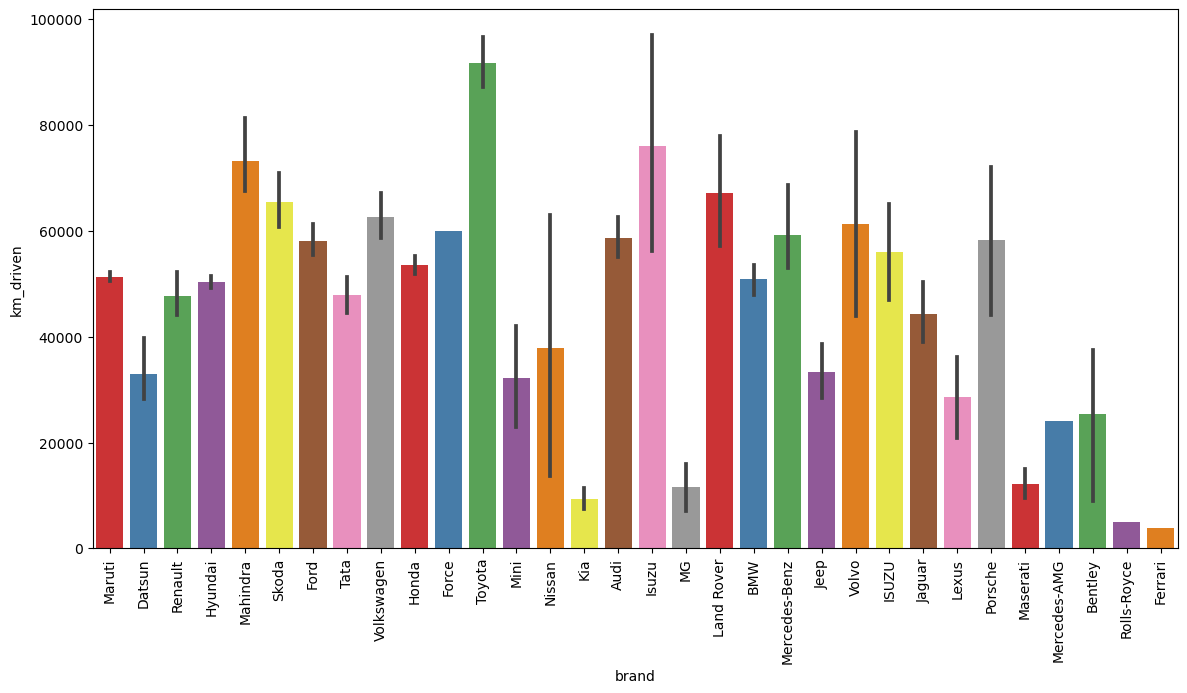

In [86]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1")
plt.xticks(rotation=90)



In [87]:
# fuel type vs selling price
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


<AxesSubplot:xlabel='fuel_type'>

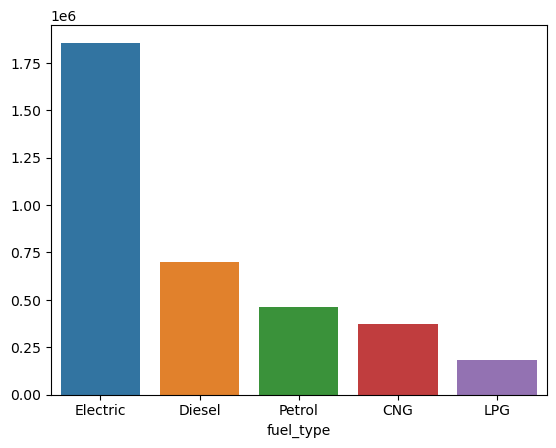

In [88]:
sns.barplot(x = fuel.index, y=fuel.values)

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

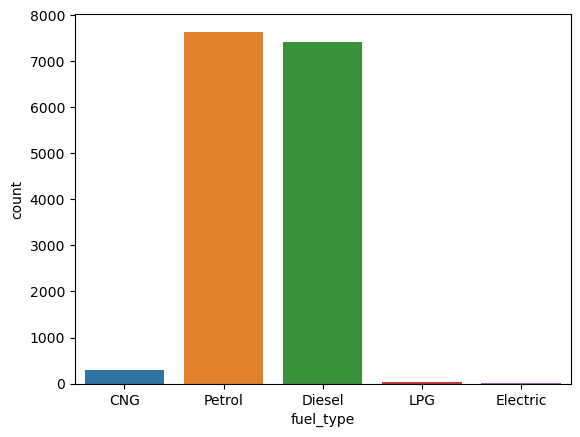

In [89]:
# most sold fuel type
sns.countplot(x=df['fuel_type'])

In [90]:
# Fuel type vs Mileage
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


<AxesSubplot:xlabel='fuel_type', ylabel='mileage'>

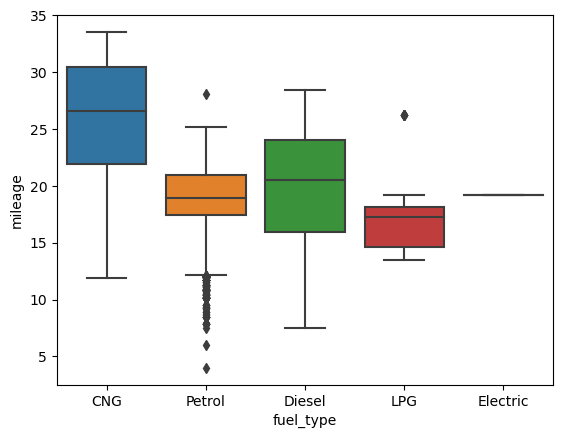

In [91]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

(0.0, 10000000.0)

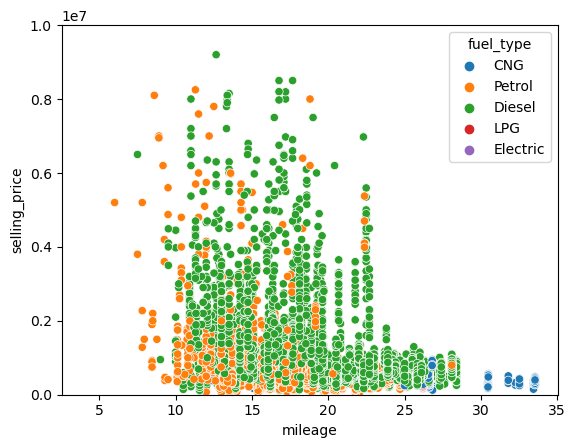

In [92]:
# mileage vs selling price
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')
plt.ylim(0,10000000)

# Mileage distribution

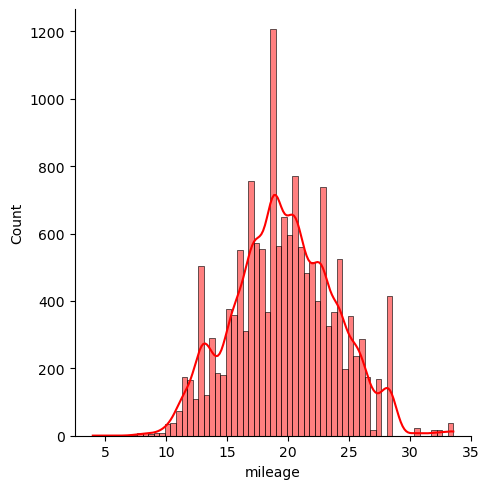

In [93]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

# vehicle age vs selling price

<AxesSubplot:xlabel='vehicle_age', ylabel='selling_price'>

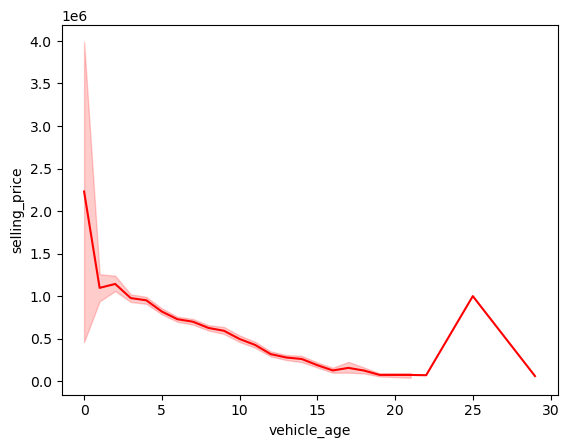

In [94]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')


# vehicle age vs mileage


In [95]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


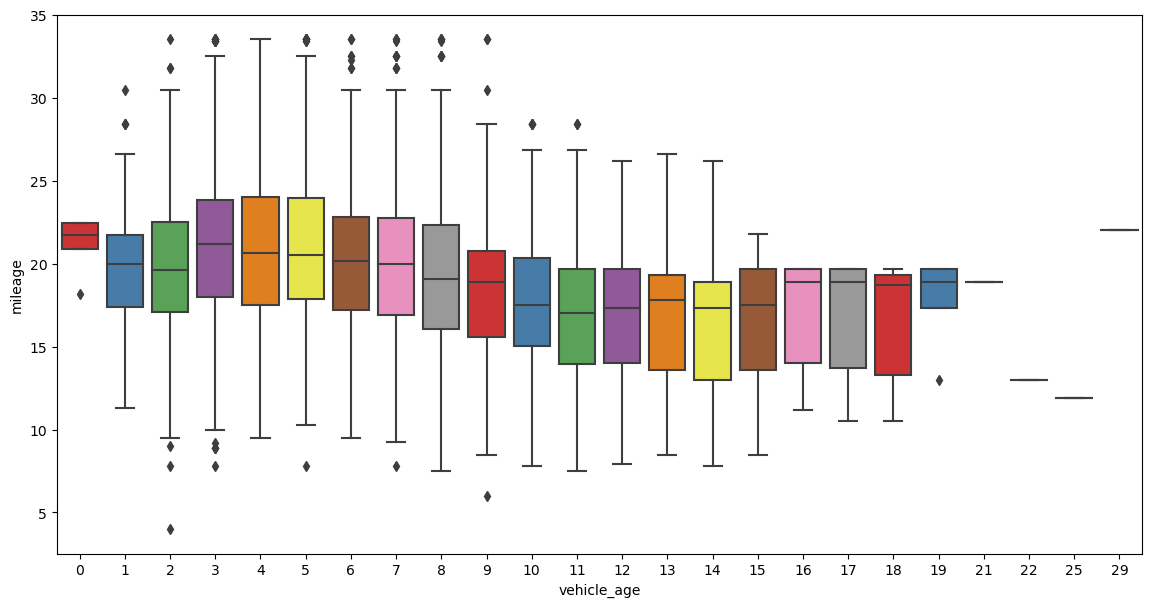

In [96]:
# plt.subplots(figure=(14,7))
# sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')


import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(14, 7))

# Create a box plot
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1', ax=ax)

# Show the plot
plt.show()


# transmission type vs selling price

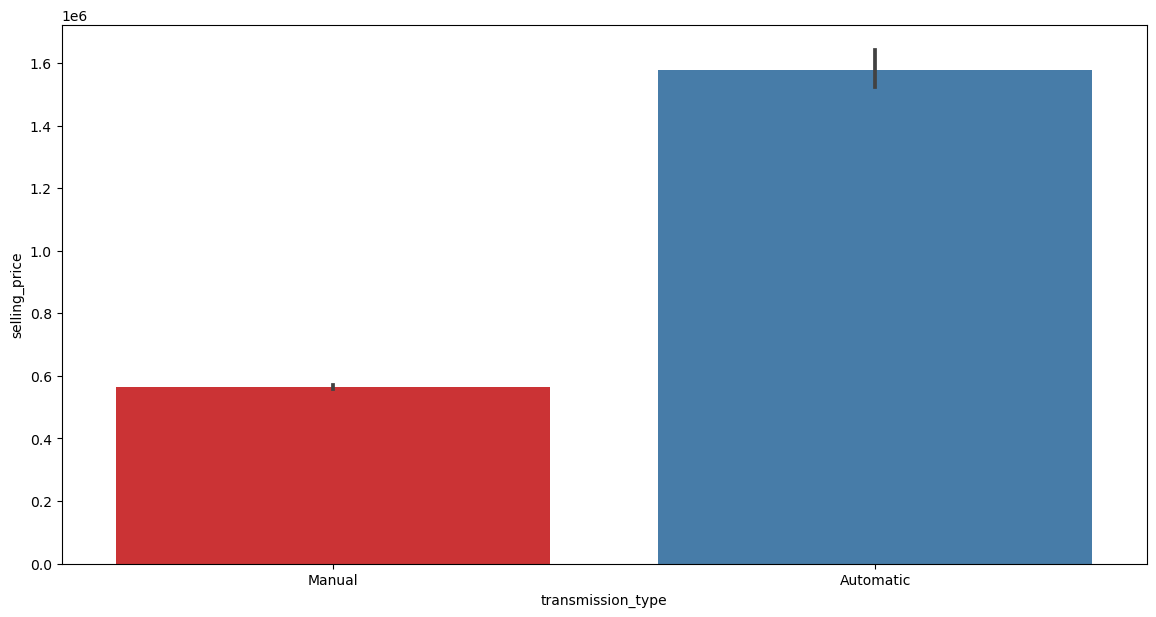

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis with the correct size
fig, ax = plt.subplots(figsize=(14, 7))

# Create a bar plot
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1", ax=ax)

# Show the plot
plt.show()


# transmission type vs mileage

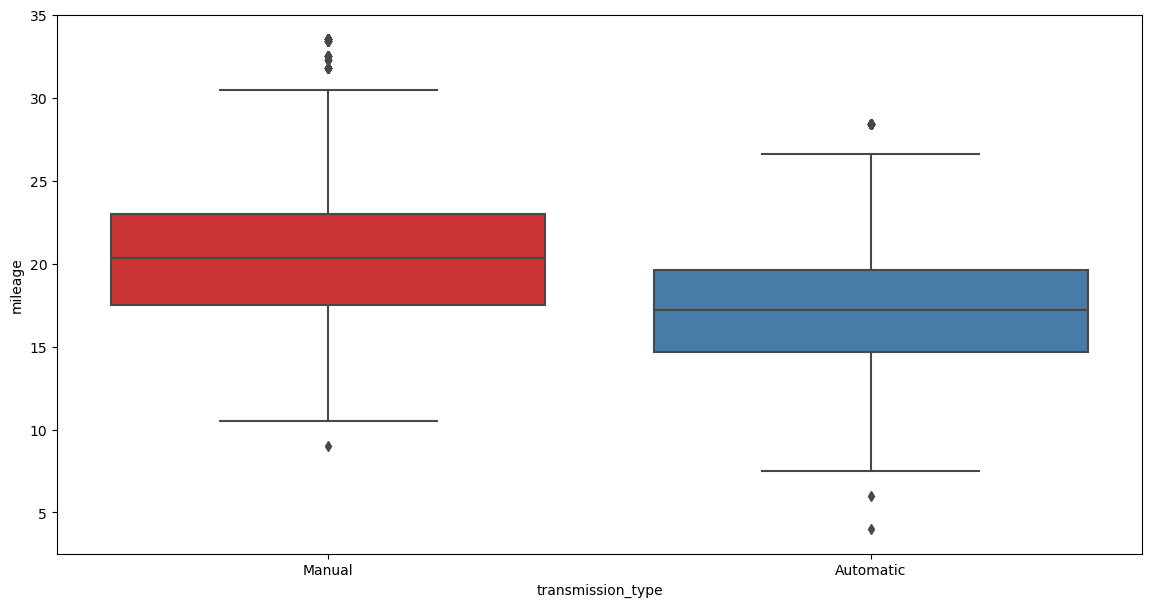

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axis with the specified size
fig, ax = plt.subplots(figsize=(14, 7))

# Create a box plot
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1", ax=ax)

# Show the plot
plt.show()


# transmission type vs count

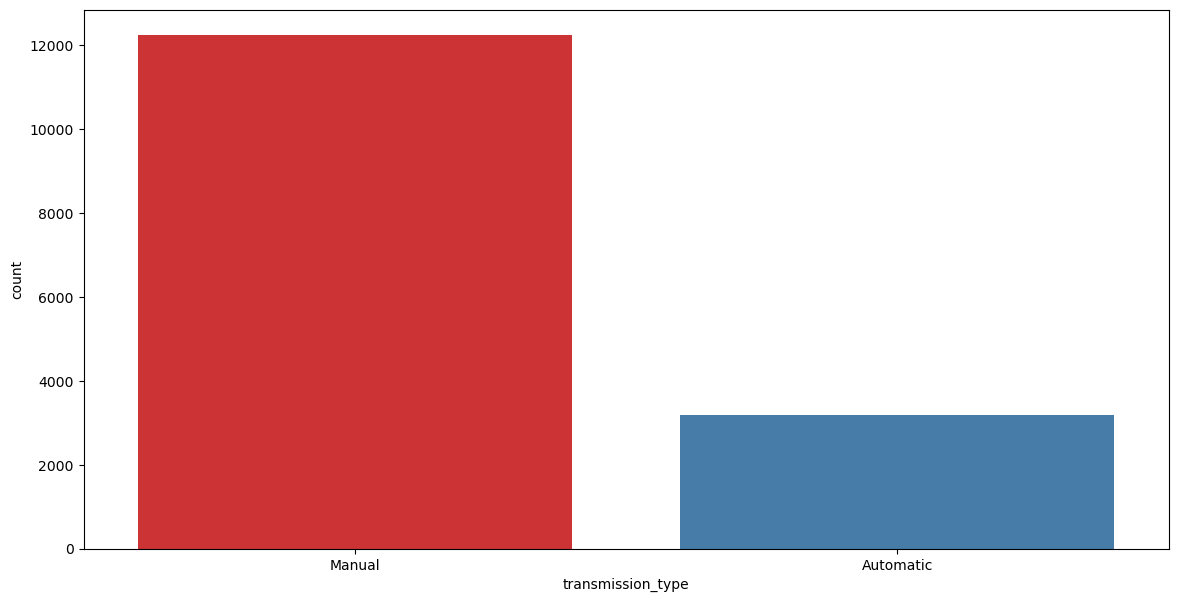

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axis with the specified size
fig, ax = plt.subplots(figsize=(14, 7))

# Create a count plot
sns.countplot(x='transmission_type', data=df, palette="Set1", ax=ax)

# Show the plot
plt.show()


# seller type vs count

# seller type vs selling price

In [100]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


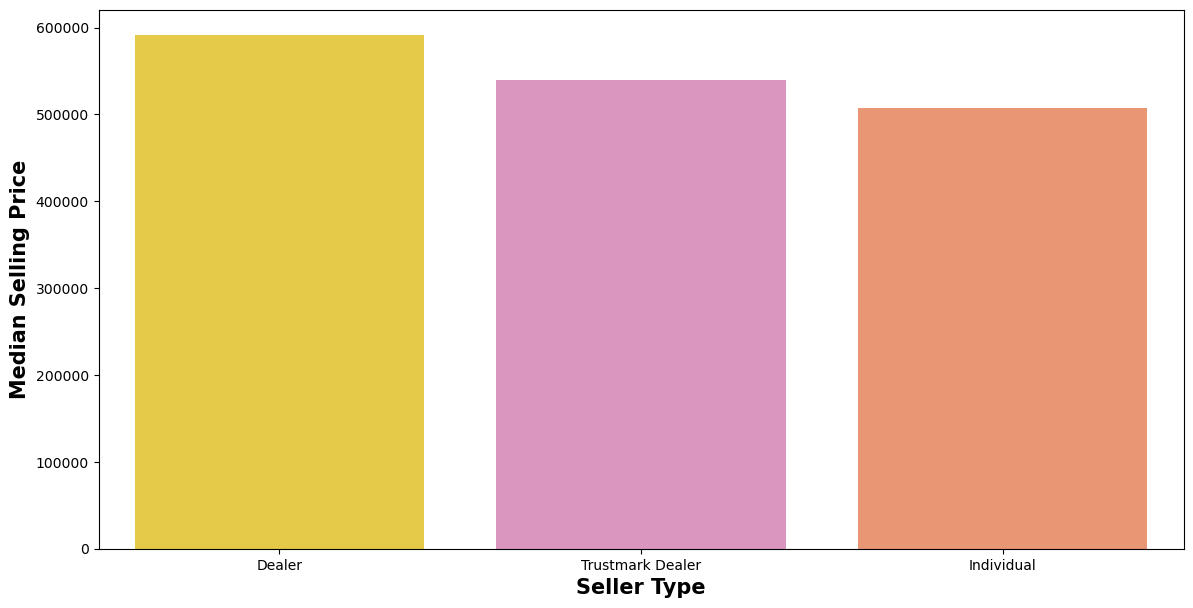

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axis with the specified size
fig, ax = plt.subplots(figsize=(14, 7))

# Create a bar plot
sns.barplot(x=dealer.index, y=dealer.values, palette="Set2_r", ax=ax)

# Set labels with specified font properties
plt.xlabel("Seller Type", weight="bold", fontsize=15)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)

# Show the plot
plt.show()


# Final report


- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

# Feature engineering

In [102]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


# Removing unnecessary columns

In [103]:
df_model = pd.read_csv("cleaned_cars.csv")
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,Toyota Innova,Toyota,Innova,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
11919,Toyota Innova,Toyota,Innova,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
11920,Toyota Innova,Toyota,Innova,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
11921,Toyota Innova,Toyota,Innova,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


In [104]:
df_model =  df.copy() # raw data
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [105]:
df_model.drop(labels=['car_name', 'brand', 'model'], axis=1, inplace=True)

In [106]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [107]:
df_model.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# converting categorical data to numerical

using One Hot Encoding(get_dummies) to convert categorical data to numerical

In [108]:
df_model = pd.get_dummies(df_model, dtype='float')

In [109]:
df_model


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,8100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,24200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,5200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,39500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [110]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# creating Feature Matrix(independent Variable) & Target variable (dependent Variable)

In [111]:
X = df_model.drop('selling_price', axis= 1) # independent variable
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [112]:
y = df_model['selling_price'] # target variable or dependent variable
y

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

# checking important features

In [113]:
pip install scikit-learn

In [114]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [115]:
print("checking for feature importance")
print("-"*50)
print(model.feature_importances_)

checking for feature importance
--------------------------------------------------
[1.71616528e-01 5.11347676e-02 6.86913138e-02 1.32536443e-01
 3.82334697e-01 1.61667086e-02 4.38476914e-03 4.47861925e-03
 2.29269842e-05 4.59490979e-05 7.48549098e-03 1.25222337e-05
 2.26011479e-06 2.32775688e-02 6.87192578e-02 6.90901772e-02]


# visualisation for feature importance

<AxesSubplot:>

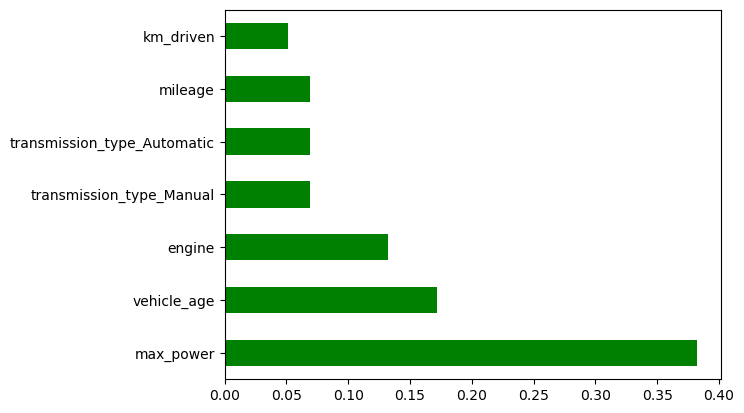

In [116]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.nlargest(7).plot(kind='barh', color='g')

# Model Building and Evaluation

Train - test split

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
X_train

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
11991,5,64312,15.40,2179,120.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7129,7,36000,17.50,1197,85.80,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14810,5,71000,21.76,1995,188.00,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9449,7,60000,25.80,1498,98.60,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1692,4,20500,23.10,998,67.04,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12948,13,57000,13.90,1799,130.20,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4315,4,20000,28.40,1248,74.02,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
79,14,40000,19.70,796,46.30,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2838,8,57617,20.00,1399,68.10,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# importing important libraries for Model Building

In [119]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [120]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

# List of models
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]

# Lists to store metrics
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    try:
        # Instantiate and fit the model
        regressor = model().fit(X_train, y_train)
        
        # Make predictions
        pred = regressor.predict(X_test)
        
        # Append metrics to respective lists
        mse.append(mean_squared_error(y_true=y_test, y_pred=pred))
        rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)))
        evs.append(explained_variance_score(y_true=y_test, y_pred=pred))
        r_square_score.append(r2_score(y_true=y_test, y_pred=pred))
    
    except Exception as e:
        print(f"An error occurred with {model.__name__}: {e}")

# Print results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", evs)
print("R-squared Score:", r_square_score)


Mean Squared Error: [221114463887.14435, 738457030434.1963, 96908692405.12488, 55036678740.981346, 221113112994.0489, 221114034111.4315]
Root Mean Squared Error: [470228.0977218868, 859335.2258776526, 311301.61002655426, 234598.97429652445, 470226.6612964953, 470227.64073524164]
Explained Variance Score: [0.6784389986938699, 9.523755049734017e-05, 0.8590838324883397, 0.9199593099795922, 0.67844099400824, 0.678439614675347]
R-squared Score: [0.6784219120093717, -0.07397587537046091, 0.8590607259902374, 0.9199573397065851, 0.678423876682379, 0.6784225370541996]


# creating DataFrame for model camparison

In [121]:
ML_model_df = pd.DataFrame({"Model":['Linear Regression', 'Support vector Regression', 'Decision Tree Regressor',\
                                      'Random Forest Regressor', 'Ridge', 'Lasso'],
                                      'Mean Squarred Error':mse,
                                      'Root mean squared error': rmse,
                                      "Explained variance Error": evs,
                                      "R-Squared Score(Accuracy)": r_square_score})

ML_model_df.set_index("Model", inplace=True)
ML_model_df

,Mean Squarred Error,Root mean squared error,Explained variance Error,R-Squared Score(Accuracy)
Model,,,,
Linear Regression,2.211145e+11,470228.097722,0.678439,0.678422
Support vector Regression,7.384570e+11,859335.225878,0.000095,-0.073976
Decision Tree Regressor,9.690869e+10,311301.610027,0.859084,0.859061
Random Forest Regressor,5.503668e+10,234598.974297,0.919959,0.919957
Ridge,2.211131e+11,470226.661296,0.678441,0.678424
Lasso,2.211140e+11,470227.640735,0.678440,0.678423


# Generating Pickle file - Saving Trained Model

In [122]:
import pickle

saved_models=[]

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"

    with open(model_filename, "wb") as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [123]:
val = [5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]

In [124]:
val=[11,43000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]
val= [6,10000,20.85,1197,83.14,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]

In [125]:
saved_models

['LinearRegression_model.pkl',
 'SVR_model.pkl',
 'DecisionTreeRegressor_model.pkl',
 'RandomForestRegressor_model.pkl',
 'Ridge_model.pkl',
 'Lasso_model.pkl']

In [126]:
for i in range (len(saved_models)):
    f= open(saved_models[i],mode="rb")
    model = pickle.load(f)
    regressor = model.fit(X_train, y_train)
    pred = model.predict([val])
    print(pred)
    

[502487.14552266]
[551684.99413606]
[585000.]
[550930.]
[502500.84685289]
[502489.66494184]


In [127]:
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    data = pickle.load(f)

In [128]:
data

RandomForestRegressor()

In [129]:
data.predict([val])

array([564333.33333333])

In [130]:
X_test

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
9831,3,74455,23.00,1498,98.96,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6119,3,25000,17.19,1197,81.86,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8289,5,50000,18.70,1199,88.70,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6655,4,12351,21.40,1197,83.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12674,4,30700,23.90,1582,126.20,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,7,69000,14.30,1598,103.50,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2769,13,20000,19.81,1086,68.05,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1274,2,3300,19.83,1198,67.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14430,8,55000,18.48,1995,177.00,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [131]:
y_test

9831      790000
6119      750000
8289      650000
6655      640000
12674     925000
          ...   
10576     450000
2769      230000
1274      490000
14430    1500000
11357     665000
Name: selling_price, Length: 3083, dtype: int64

In [132]:
val =[2,37095,24.30,1248,88.50,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]
data.predict([val])

array([902240.])

In [133]:
data.score(X_train,y_train)

0.9798483632388628

In [134]:
data.score(X_test,y_test)

0.9190002927445164

In [5]:
from tkinter import *
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
        model = pickle.load(f)
seller_selected_value=""
fuel_selected_value=""
transmission_selected_value=""

def pred_price():

    input_values=[]
    
    input_values.append(int(vehicle_age_entry.get()))
    input_values.append(int(km_driven_entry.get()))
    input_values.append(float(mileage_entry.get()))
    input_values.append(int(engine_entry.get()))
    input_values.append(float(max_power_entry.get()))
    if int(seats_entry.get()) <= 7:
        input_values.append(int(seats_entry.get()))
    else:
        print("invalid seats")

    # car_name_values=['Maruti Alto', 'Maruti Celerio', 'Datsun RediGO', 'Renault KWID',
    #    'Datsun redi-GO', 'Maruti Wagon R', 'Hyundai Santro',
    #    'Maruti Eeco', 'Mahindra Bolero', 'Mahindra Thar', 'Hyundai Grand',
    #    'Skoda Octavia', 'Datsun GO', 'Maruti S-Presso', 'Ford Figo',
    #    'Hyundai i10', 'Tata Tiago', 'Tata Tigor', 'Renault Triber',
    #    'Volkswagen Polo', 'Maruti Swift Dzire', 'Maruti Baleno',
    #    'Maruti Ignis', 'Maruti Swift', 'Mahindra Scorpio', 'Mahindra KUV',
    #    'Mahindra KUV100', 'Honda City', 'Honda Amaze', 'Hyundai i20',
    #    'Maruti Ertiga', 'Force Gurkha', 'Toyota Glanza', 'Hyundai Aura',
    #    'Renault Duster', 'Tata Altroz', 'Ford Aspire', 'Maruti Ciaz',
    #    'Maruti Dzire LXI', 'Maruti Dzire VXI', 'Maruti Dzire ZXI',
    #    'Maruti Vitara', 'Honda Jazz', 'Hyundai Creta', 'Hyundai Venue',
    #    'Hyundai Verna', 'Honda WR-V', 'Ford Ecosport', 'Ford Freestyle',
    #    'Mini Cooper', 'Toyota Innova', 'Skoda Rapid', 'Volkswagen Vento',
    #    'Maruti XL6', 'Nissan Kicks', 'Toyota Yaris', 'Tata Nexon',
    #    'Mahindra XUV300', 'Kia Seltos', 'Hyundai Elantra', 'Honda CR-V',
    #    'Mahindra Marazzo', 'Tata Safari', 'Honda Civic', 'Audi A4',
    #    'Isuzu D-Max', 'Mahindra XUV500', 'Skoda Superb', 'Tata Harrier',
    #    'Ford Endeavour', 'MG Hector', 'Land Rover Rover',
    #    'Nissan X-Trail', 'Tata Hexa', 'BMW 5', 'Hyundai Tucson', 'BMW 3',
    #    'Toyota Camry', 'Mercedes-Benz E-Class', 'Jeep Compass',
    #    'Volvo XC60', 'Toyota Fortuner', 'Mercedes-Benz GL-Class',
    #    'Mercedes-Benz C-Class', 'Audi A6', 'Isuzu MUX', 'ISUZU MUX',
    #    'Jaguar F-PACE', 'BMW X1', 'Jaguar XE', 'Jaguar XF',
    #    'Mahindra Alturas', 'BMW X3', 'Honda CR', 'BMW 6', 'Volvo S90',
    #    'BMW X4', 'Lexus NX', 'Kia Carnival', 'Volvo XC',
    #    'Mercedes-Benz CLS', 'Mercedes-Benz S-Class', 'Lexus ES', 'BMW X5',
    #    'Volvo XC90', 'Porsche Cayenne', 'Audi Q7', 'Audi A8',
    #    'Porsche Macan', 'BMW 7', 'Mercedes-Benz GLS', 'Lexus RX',
    #    'Maserati Quattroporte', 'Maserati Ghibli', 'Jeep Wrangler',
    #    'Porsche Panamera', 'BMW Z4', 'Mercedes-AMG C',
    #    'Bentley Continental', 'Rolls-Royce Ghost', 'Ferrari GTC4Lusso']
    # for i in car_name_values:
    #     if str(car_name_entry) == i:
    #         input_values.append(1.0)
    #     else:
    #         input_values.append(0.0)
    
    if seller_selected_value == "Dealer":
        input_values.append(1.0)
        input_values.append(0.0)
        input_values.append(0.0)
    elif seller_selected_value == "Individual":
        input_values.append(0.0)
        input_values.append(1.0)
        input_values.append(0.0)
    else:
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(1.0)
    
    if fuel_selected_value == "CNG":
        input_values.append(1.0)
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(0.0)
    elif fuel_selected_value== "Diesel":
        input_values.append(0.0)
        input_values.append(1.0)
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(0.0)
    elif fuel_selected_value== "Electric":
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(1.0)
        input_values.append(0.0)
        input_values.append(0.0)
    elif fuel_selected_value == "LPG":
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(1.0)
        input_values.append(0.0)
    else:
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(0.0)
        input_values.append(1.0)
    
    if transmission_selected_value == "Automatic":
        input_values.append(1.0)
        input_values.append(0.0)
    else:
        input_values.append(0.0)
        input_values.append(1.0)
        
    if len(input_values) == 16:
        prediction = model.predict([input_values])[0]
        price_label.config(text = f"Price of your Car is: {prediction}")
        print(f"Predicted price: {prediction}")
    else:
        print("some values are missing")



root = Tk()
root.geometry("1080x720")
root.title("Car Price Predictor")

root.config(bg="black")

title_label = Label(root, text="Car Price Predictor", bg="black", fg="green", font=("Arial", 30, "bold"), justify="center")
title_label.pack(pady=30)

car_name_frame = Frame(root, bg="black")
car_name_frame.pack()
car_name_label = Label(car_name_frame, text="Car Name", bg="black", fg="white", font=("Arial", 20, "bold"),  justify="left")
car_name_label.pack(side=LEFT, padx=30)
car_name_entry = Entry(car_name_frame, font=('Arial', 15, "bold"))
car_name_entry.pack(side=LEFT)


vehicle_age_frame = Frame(root, bg="black")
vehicle_age_frame.pack()
vehicle_age_label = Label(vehicle_age_frame, text="Vehicle Age", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
vehicle_age_label.pack(side=LEFT, padx=19)
vehicle_age_entry = Entry(vehicle_age_frame,  font=('Arial', 15, "bold"))
vehicle_age_entry.pack(side=LEFT)


km_driven_frame = Frame(root,bg="black")
km_driven_frame.pack()
km_driven_label = Label(km_driven_frame, text="KM Driven", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
km_driven_label.pack(side=LEFT, padx=30)
km_driven_entry = Entry(km_driven_frame,  font=('Arial', 15, "bold"))
km_driven_entry.pack(side=LEFT)


mileage_frame = Frame(root,bg="black")
mileage_frame.pack()
mileage_label = Label(mileage_frame, text="Mileage", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
mileage_label.pack(side=LEFT, padx=50)
mileage_entry = Entry(mileage_frame,  font=('Arial', 15, "bold"))
mileage_entry.pack(side=LEFT)

engine_frame = Frame(root,bg="black")
engine_frame.pack()
engine_label = Label(engine_frame, text="Engine", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
engine_label.pack(side=LEFT, padx=50)
engine_entry = Entry(engine_frame,  font=('Arial', 15, "bold"))
engine_entry.pack(side=LEFT)


max_power_frame = Frame(root,bg="black")
max_power_frame.pack()
max_power_label = Label(max_power_frame, text="Max Power", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
max_power_label.pack(side=LEFT, padx=30)
max_power_entry = Entry(max_power_frame,  font=('Arial', 15, "bold"))
max_power_entry.pack(side=LEFT)

seats_frame = Frame(root,bg="black")
seats_frame.pack()
seats_label = Label(seats_frame, text="Seats", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
seats_label.pack(side=LEFT, padx=60)
seats_entry = Entry(seats_frame,  font=('Arial', 15, "bold"))
seats_entry.pack(side=LEFT)

seller_type_frame = Frame(root,bg="black")
seller_type_frame.pack()
seller_type_label = Label(seller_type_frame, text="Seller Type", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
seller_type_label.pack(side=LEFT, padx=60)
# Dictionary to create multiple buttons
seller_type_values = {"Dealer" : "Dealer",
          "Individual" : "Individual",
          "Trustmark Dealer" : "Trustmark Dealer"}
selected_seller = StringVar(root, "1")
def on_seller_selected():
    seller_selected_value = selected_seller.get()
    print(f"Selected value: {seller_selected_value}")
  
# Loop is used to create multiple Radiobuttons
# rather than creating each button separately
for (text, value) in seller_type_values.items():
    Radiobutton(seller_type_frame, text = text, variable = selected_seller, 
                value = value, font=("Arial", 10, "bold"), command=on_seller_selected).pack(side=LEFT, ipady = 5)

fuel_type_frame = Frame(root,bg="black")
fuel_type_frame.pack()
fuel_type_label = Label(fuel_type_frame, text="Fuel Type", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
fuel_type_label.pack(side=LEFT, padx=80)
# Dictionary to create multiple buttons
fuel_type_values = {"CNG" : "CNG",
          "Diesel" : "Diesel",
          "Electric": "Electric",
          "LPG": "LPG",
          "Petrol" : "Petrol"}
selected_fuel = StringVar(root, "1")
def on_fuel_selected():
    fuel_selected_value = selected_fuel.get()
    print(f"Selected value: {fuel_selected_value}")
  
# Loop is used to create multiple Radiobuttons
# rather than creating each button separately
for (text, value) in fuel_type_values.items():
    Radiobutton(fuel_type_frame, text = text, variable = selected_fuel, 
                value = value, font=("Arial", 10, "bold"), command=on_fuel_selected).pack(side=LEFT, ipady = 5)    

transmission_type_frame = Frame(root,bg="black")
transmission_type_frame.pack()
transmission_type_label = Label(transmission_type_frame, text="Transmission Type", bg="black", fg="white", font=("Arial", 20, "bold"), justify="left")
transmission_type_label.pack(side=LEFT,padx=10)
# Dictionary to create multiple buttons
transmission_type_values = {"Automatic" : "Automatic",
          "Manual" : "Manual"}
selected_transmission = StringVar(root, "1")
def on_transmission_selected():
    transmission_selected_value = selected_transmission.get()
    print(f"Selected value: {transmission_selected_value}")
  
# Loop is used to create multiple Radiobuttons
# rather than creating each button separately
for (text, value) in transmission_type_values.items():
    Radiobutton(transmission_type_frame, text = text, variable = selected_transmission, 
                value = value, font=("Arial", 10, "bold"), command=on_transmission_selected).pack(side=LEFT, ipady = 5)    
    
pred_btn =Button(root, text="Predict Price", command=pred_price,bg= "green", fg="white", font=("Arial", 20, "bold"))
pred_btn.pack(pady=30)

price_label=Label(root, text=f"Predicted Price: {0}", bg="black", fg="white", font=("Arial", 20, "bold"))
price_label.pack()


root.mainloop()

Selected value: Dealer
Selected value: Petrol
Selected value: Manual


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted price: 923735.0


C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted price: 2332980.0
